<a href="https://colab.research.google.com/github/khoa2210/KHDL/blob/main/H%E1%BB%93i_quy_tuy%E1%BA%BFn_t%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl

In [ ]:

# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# Quandl will be used for importing historical oil prices
import quandl

In [ ]:
# Importing our data
data = quandl.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2020-01-01")
data.head()

,Value
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


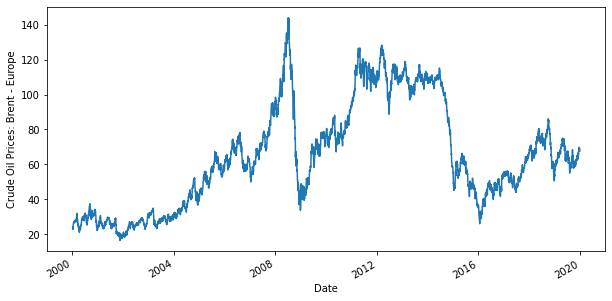

In [ ]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data.Value.plot(figsize=(10,5))

In [ ]:
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9']= data['Value'].shift(1).rolling(window=9).mean()

In [ ]:
# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

# Getting the head of the data
X.head()

,MA3,MA9
Date,,
2000-01-17,25.006667,24.032222
2000-01-18,25.463333,24.258889
2000-01-19,25.933333,24.546667
2000-01-20,26.156667,24.837778
2000-01-21,26.246667,25.161111


In [ ]:
# Setting-up the dependent variable
Y = data['Value']

# Getting the head of the data
Y.head()

Date
2000-01-17    25.99
2000-01-18    26.31
2000-01-19    26.17
2000-01-20    26.26
2000-01-21    27.18
Name: Value, dtype: float64

In [ ]:
# Setting the training set to 95% of the data
training = 0.95
t = int(training*len(data))

# Training dataset
X_train = X[:t]
Y_train = Y[:t]

# Testing dataset
X_test = X[t:]
Y_test = Y[t:]

In [ ]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,Y_train)

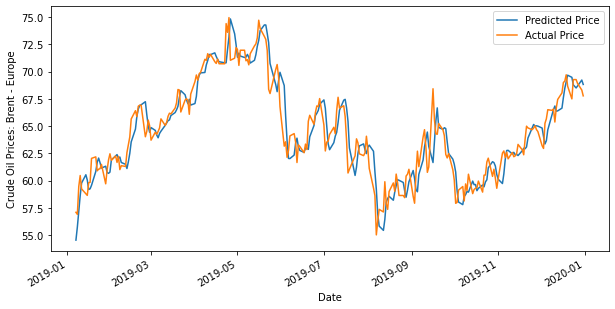

In [ ]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=Y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
Y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

In [ ]:
R_squared_score = model.score(X[t:],Y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 86.46% accuracy.
